In [25]:
# Import Dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [26]:
# Load the data
df = pd.read_csv("myopia.csv")
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [27]:
# Drop the null columns where all values are null
null = df.isnull().sum()
null

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [28]:
#Drop duplicate rows
duplicate = df.duplicated().sum()
duplicate

0

In [29]:
# Split the dataframe into data and target
target = df['MYOPIC']
features = df.drop('MYOPIC', axis=1)
features

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [30]:
# Create a scaler to standardise the data
scaler = StandardScaler()
# Fit and Transforme.
scaled_features = scaler.fit_transform(features)

scaled_features.shape

(618, 14)

In [31]:
# Perform dimensionality reduction with PCA
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(scaled_features)
X_pca.shape

## The number of features changed from 14 to 10 following dimensionality reduction with PCA ##

(618, 10)

In [32]:
# Further reduce the dataset with TSNE
tsne = TSNE(learning_rate=35,n_iter=2000,verbose=1)
X_tsne = tsne.fit_transform(X_pca)
X_tsne.shape

## The number of features changed from 10 to 2 following TSNE reduction ##

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.001s...
[t-SNE] Computed neighbors for 618 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.301571
[t-SNE] KL divergence after 50 iterations with early exaggeration: 63.976070
[t-SNE] KL divergence after 2000 iterations: 1.106566


(618, 2)

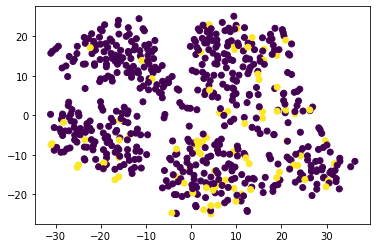

In [33]:
# Create a scatter plot of the TSNE output
tsne_df = pd.DataFrame(
    data=X_tsne,
    columns=['pc1', 'pc2'])

plt.scatter(tsne_df.pc1, tsne_df.pc2, c=target)
plt.show()

## It appears that there are no distinct clusters that can be easily identified. ##

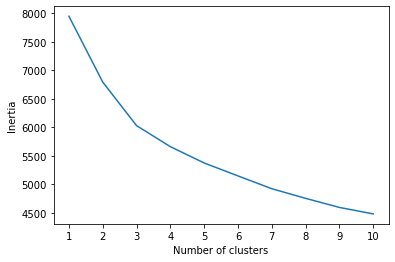

In [34]:
# Create an elbow plot to identify the best number of clusters
pca_df = pd.DataFrame(data=X_pca)

inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## The first elbow seems to be at k=3 ##

In [35]:
# Function to get clusters
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

# Get clusters where k=3
clusters = get_clusters(3, pca_df)
clusters.head()

,0,1,2,3,4,5,6,7,8,9,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


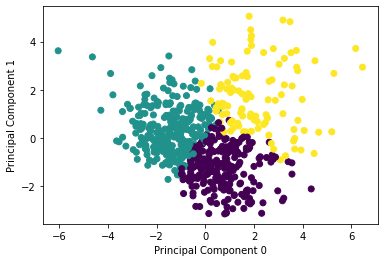

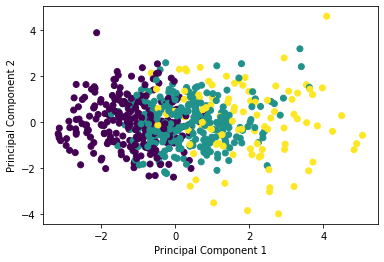

In [21]:
# Function to show clusters
def show_clusters(df, x, y):
    plt.scatter(df[x], df[y], c=df['class'])
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')
    plt.show()

show_clusters(pca_df, 0, 1)
show_clusters(pca_df, 1, 2)

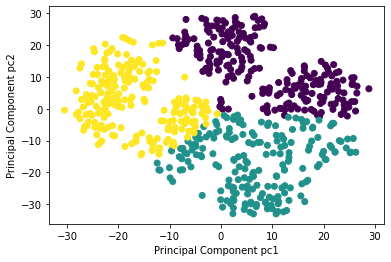

In [22]:
# Trying with TSNE data, not sure if you can do this
get_clusters(3, tsne_df)
show_clusters(tsne_df, 'pc1', 'pc2')

# My Recommendation 

 Following an analysis of the myopia dataset, it seems inconclusive that the patients can be clustered as there were varying results. After preprocessing the data, I conducted dimensionalilty reduction using two methods. The first method used was Principal Component Analysis (PCA) which reduced the number of features from 14 to 10. The second method used on the PCA transformation was T-distributed Stochastic Neighbourhood Embedding (tSNE) which further reduced the number of features from 10 to 2. Upon visualization of the tSNE transformation using matplotlib, it did not seem to identify any distinct clusters. However, after performing the elbow method to identify the best number of clusters using K-Means, 3 clusters seemed to be the suggested number of clusters. After using K-Means clustering on the PCA transformation with 3 clusters and plotting the first 2 principal components, it did in fact suggest that 3 clusters may be a correct number of clusters. Plotting the next principal components seemed to start adding more noise. Overall, it seems to suggest that the patients could potentially be clustered into 3 clusters based on the K-Means clustering method. Although, it may be better moving forward to conduct further analysis of the dataset to make sure that we are not getting some false positives/misleading information.